# Intro

* Loading Data and Libraries

In [ ]:
# loading libraries

import numpy as np
import pandas as pd

In [ ]:
# reading dataset

df = pd.read_csv("products.csv")
print("the dataset has " + str(df.shape[0]) + " observations (ice cream flavors) and " + str(df.shape[1]) + " features " + str([col for col in df.columns]))

# dataset: https://www.kaggle.com/datasets/tysonpo/ice-cream-dataset

# Inspiration Notebooks:
# Using Ice Cream Ingredients to Predict Rating: https://www.kaggle.com/code/gcdatkin/using-ice-cream-ingredients-to-predict-rating
# Finding the Best Ice Cream: https://www.kaggle.com/code/kelvintran1998/finding-the-best-ice-cream
# EDA ideas: McDonalds Ice Cream Machines Breaking: https://www.kaggle.com/code/aashidutt3/eda-mcdonalds-ice-cream-machines-breaking

In [ ]:
df.head(10)

* Data Cleaning: transform brand feature to more readable names

In [ ]:
# change brand name to be more readable

df['brand'] = df['brand'].replace(['hd','breyers','bj','talenti'],['HaagenDazs','Breyers','BenJerrys','Talenti'])
df['brand'].value_counts()

# Exploratory Data Analysis

* Exploratory Data Analysis: Color Scheme

In [5]:
# loading dataviz libraries

import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

sns.set_theme(style="whitegrid")
sns.despine(left=True, bottom=True)

<Figure size 640x480 with 0 Axes>

Notebook Color Scheme: 
Ben Jerry's, Häagen-Dazs, Talenti, Breyers


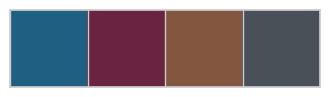

In [6]:
# color scheme

class clr:
    S = '\033[1m' + '\033[96m' # chance color text
    E = '\033[0m'
    
my_colors = ['#1F6082', '#6A2340', '#83563f', '#495057']

sns.palplot(sns.color_palette(my_colors))

print(clr.S + "Notebook Color Scheme: " + clr.E)
print(r"Ben Jerry's, Häagen-Dazs, Talenti, Breyers")


In [7]:
# create color reference dict
# the idea is to use this dict to sort the color code in the same way of the plot
# colors = ['#1F6082', '#6A2340', '#83563f', '#171717']

color_reference = {'BenJerrys':'#1F6082', 'Breyers':'#495057', 'HaagenDazs':'#6A2340', 'Talenti':'#83563f'}
color_reference

{'BenJerrys': '#1F6082',
 'Breyers': '#495057',
 'HaagenDazs': '#6A2340',
 'Talenti': '#83563f'}

In [8]:
# setting and standardizing parameters for all graphs

sns.set()
plt.style.use('seaborn-v0_8-notebook')
%matplotlib inline
rcParams['figure.figsize'] = 12,8
rcParams['figure.titlesize'] = 14
rcParams['font.size'] = 15

* Exploratory Data Analysis

In [9]:
# change column names

flavors = df['brand'].value_counts().reset_index().sort_values('brand', ascending=False)
flavors = flavors.rename(columns = {'index':'brand', 'brand':'value_counts'})
flavors

,brand,value_counts
0,HaagenDazs,70
1,Breyers,69
2,BenJerrys,57
3,Talenti,45


Text(0, 0.5, '# Flavors')

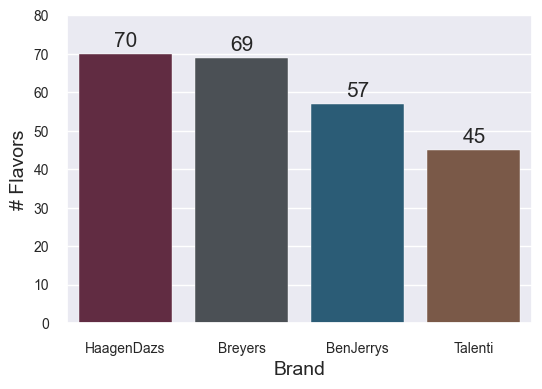

In [10]:
# plot the brands flavors counts

plt.figure(figsize=(6, 4))
colors = flavors['brand'].replace(color_reference) # replace elements in a list using dictionary lookup
colors = colors.tolist() # list of colors for palette parameter in sns plot
splot = sns.barplot(data=flavors, x='brand', y='value_counts', palette=colors)
plt.ylim([0,80])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Brand', fontsize=14)
plt.ylabel('# Flavors', fontsize=14)


* Exploratory Data Analysis: Flavors vs Rating

Text(0, 0.5, 'Flavors')

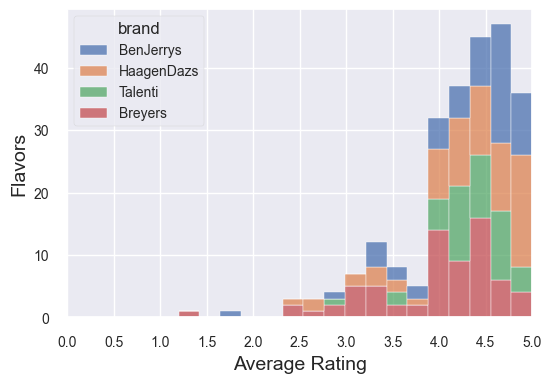

In [11]:
# rating distribution

plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='rating', hue='brand', multiple='stack')
plt.xlim([0,5.0])
plt.xticks(np.arange(0,5.1, step=0.5))
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Flavors', fontsize=14)

Calculating kurtosis and Skewness

In [12]:
# import scipy
from scipy.stats import skew, kurtosis

In [13]:
# calculate the skewness

skewness = skew(df['rating'], axis=0)

if skewness == 0:
    print('the skewness value is ' + str(round(skewness,2)) + '. Then normally distributed.')
if skewness > 0:
    print('the skewness value is ' + str(round(skewness,2)) + '. Then more weight in the left tail of the distribution.')
if skewness < 0:
    print('the skewness value is ' + str(round(skewness,2)) + '. Then more weight in the right tail of the distribution.')

the skewness value is -1.56. Then more weight in the right tail of the distribution.


In [14]:
# calculate the kurtosis
kurt =  kurtosis(df['rating'], axis=0)

if kurt == 3:
    print('the skewness value is ' + str(round(kurt,2)) + '. Then the distribution is mesokurtic.')
if kurt < 3:
    print('the skewness value is ' + str(round(kurt,2)) + '. Then the distribution is platykurtic (short tails).')
if kurt > 3:
    print('the skewness value is ' + str(round(kurt,2)) + '. Then the distribution is leptokurtic (thinner in the center and fatter tails. ie more outliers)')

the skewness value is 3.03. Then the distribution is leptokurtic (thinner in the center and fatter tails. ie more outliers)


In [15]:
# change column names

ratings_by_brand = df.groupby('brand')['rating_count'].sum().reset_index().sort_values('brand', ascending=True)
ratings_by_brand

,brand,rating_count
0,BenJerrys,7954
1,Breyers,5009
2,HaagenDazs,4657
3,Talenti,4074


Text(0, 0.5, '# Reviews')

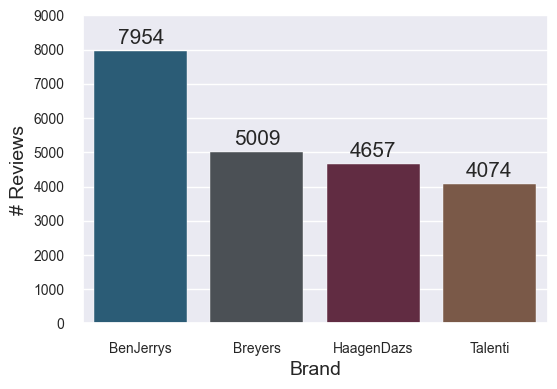

In [16]:
# plot the brands flavors counts

plt.figure(figsize=(6, 4))
colors = ratings_by_brand['brand'].replace(color_reference) # replace elements in a list using dictionary lookup
colors = colors.tolist() # list of colors for palette parameter in sns plot
splot = sns.barplot(data=ratings_by_brand, x='brand', y='rating_count', palette=colors)
plt.ylim([0,9000])
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel('Brand', size=14)
plt.ylabel('# Reviews', size=14)

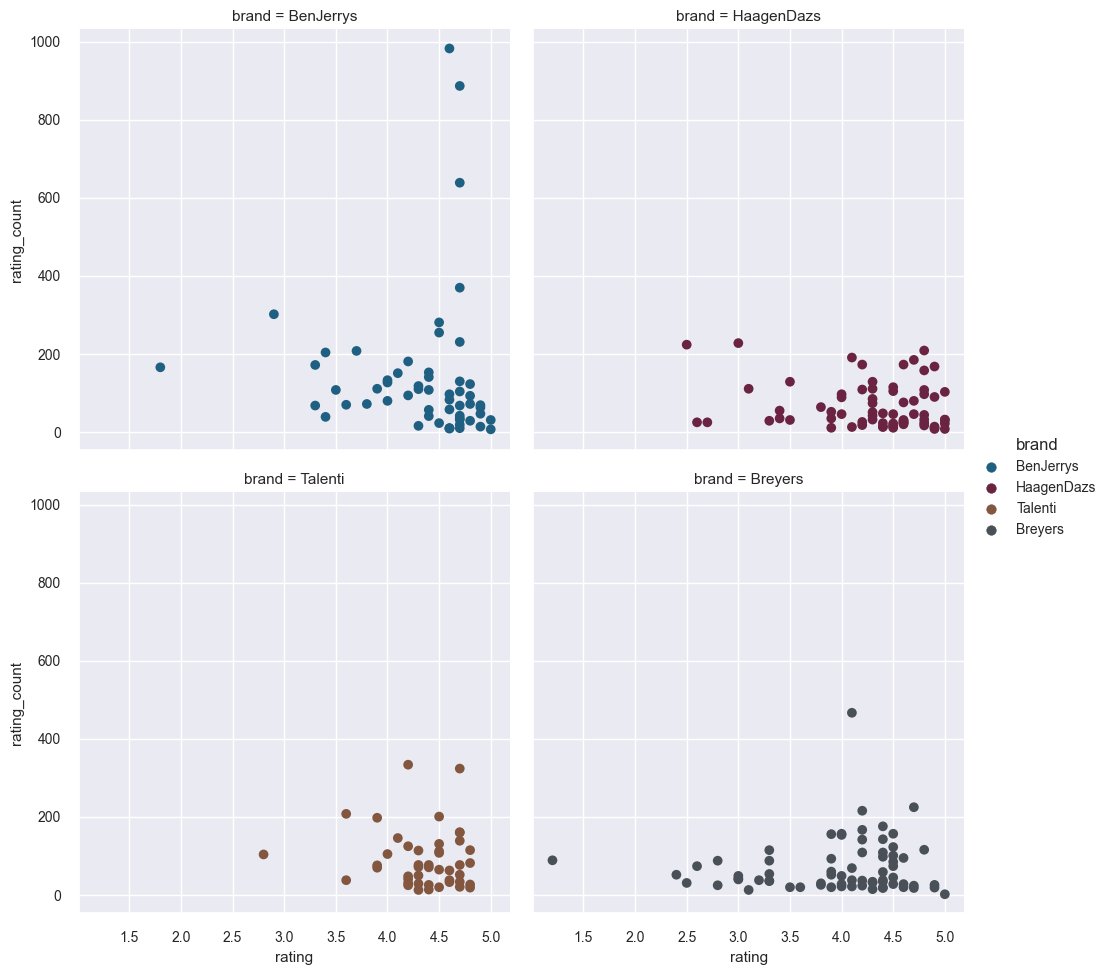

In [17]:
# scatter plot by brand

sns.relplot(data=df,
                x='rating', y='rating_count',
                hue='brand',
                col='brand',
                palette=my_colors,
                sizes=(1, 6), linewidth=0, col_wrap=2
                )

C:\Temp\ipykernel_12132\54008859.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(data=df, x='brand', y='rating', palette=my_colors, ax=axs[0])


<AxesSubplot: xlabel='brand', ylabel='rating'>

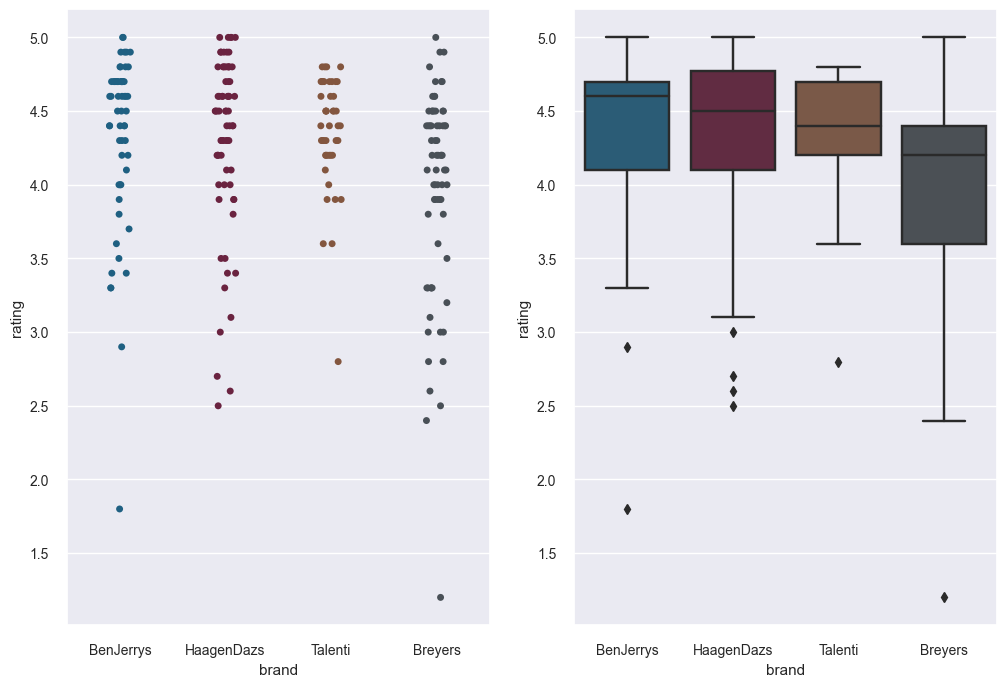

In [18]:
# scatter plot by rating vs. brand

_, axs = plt.subplots(nrows=1, ncols=2) # making a subplot with 1 row and 2 columns
sns.stripplot(data=df, x='brand', y='rating', palette=my_colors, ax=axs[0])
sns.boxplot(data=df, x='brand', y='rating', palette=my_colors, ax=axs[1])

* Flavors with low rating counts

In [19]:
low_rating_count = df.query('rating_count < 10') # number choosed arbritrary
low_rating_count

,brand,key,name,subhead,description,rating,rating_count,ingredients
7,BenJerrys,7_bj,Chocolate Peanut Butter Split,Chocolate & Banana Ice Creams with Mini Peanut...,We’ve loaded our banana and chocolate ice crea...,5.0,7,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
11,BenJerrys,11_bj,Bourbon Pecan Pie,"Buttery Bourbon Ice Cream with Pecans, Shortbr...",Not long ago we scoop-toured through Texas ask...,4.6,9,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
62,HaagenDazs,5_hd,Caramel Soft Dipped Ice Cream Bar,NaN,Introducing New Soft Dipped Caramel Ice Cream ...,4.9,8,"CARAMEL ICE CREAM: CREAM, SKIM MILK, SUGAR, EG..."
101,HaagenDazs,44_hd,Peppermint Bark Ice Cream Bar,NaN,Our peppermint bark ice cream bars start with ...,5.0,8,"WHITE CHOCOLATE ICE CREAM: CREAM, SKIM MILK, S..."
213,Breyers,41_breyers,OREO® Snack Cups 10ct,NaN,Breyers® vanilla with real OREO®? Yes please! ...,5.0,2,"SKIM MILK, LIQUID SUGAR, SUGAR, WATER, CREAM, ..."


* Worst Ice Creams and checking their reviews

In [25]:
worst10 = df.sort_values('rating').head(10)
worst10

,brand,key,name,subhead,description,rating,rating_count,ingredients
221,Breyers,49_breyers,Chocolate Chip Cookie Dough,NaN,With creamy vanilla and chunks of cookie dough...,1.2,89,"MILK, SUGAR, CORN SYRUP, CREAM, ENRICHED WHEAT..."
50,BenJerrys,50_bj,Chocolate Chip Cookie Dough Core,Cookie Milk Ice Cream with Fudge Chips & a Cho...,Our latest cookie dough creation is boldly loa...,1.8,166,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
223,Breyers,51_breyers,Coffee,NaN,Enjoy Breyers® Coffee by the scoop and brew up...,2.4,52,"MILK, CORN SYRUP, SUGAR, CREAM, COFFEE EXTRACT..."
238,Breyers,66_breyers,Layered Dessert S'mores,NaN,Calling all S'mores lovers! Make sure you don'...,2.5,31,"MILK, CORN SYRUP, SUGAR, WHEAT FLOUR, BUTTER, ..."
123,HaagenDazs,66_hd,Vanilla Milk Chocolate Almond Ice Cream Bar,NaN,"We start with pure, sweet vanilla and blend it...",2.5,224,"CREAM, SKIM MILK, SUGAR, EGG YOLKS, MILK CHOCO..."
67,HaagenDazs,10_hd,Chocolate Soft Dipped Ice Cream Bar,NaN,Introducing New Soft Dipped Chocolate Ice Crea...,2.6,25,"CHOCOLATE ICE CREAM: CREAM, SKIM MILK, SUGAR, ..."
210,Breyers,38_breyers,Butter Pecan,NaN,Discover Breyers® Butter Pecan with rich vanil...,2.6,74,"MILK, SUGAR, CORN SYRUP, CREAM, PECANS, WHEY, ..."
97,HaagenDazs,40_hd,Peanut Butter Chip HEAVEN Light Ice Cream,NaN,Introducing new HEAVEN Peanut Butter Chip ligh...,2.7,25,"SKIM MILK, CREAM, CANE SUGAR, PEANUTS, EGG YOL..."
240,Breyers,68_breyers,Layered Dessert Brownie Cheesecake,NaN,Love brownie cheesecake? What about Breyers®? ...,2.8,25,"MILK, CORN SYRUP, SUGAR, ENRICHED WHEAT FLOUR,..."
195,Breyers,23_breyers,CarbSmart™ Peanut Butter,NaN,Breyers® CarbSmart™ proves that fewer carbs do...,2.8,88,"MILK, CREAM, SORBITOL, MALTODEXTRIN (CORN), PE..."


In [22]:
# calling the ice cream reviews dataset

df_reviews = pd.read_csv("reviews.csv")

In [27]:
# create a list of values to filter by ice cream's keys

values_list = worst10['key'].unique()

# filtering by two conditions: ice creams worst ratings and one star reviews
filtered_reviews = df_reviews[df_reviews['key'].isin(values_list)]
worst10_1star_reviews =  filtered_reviews.query('stars == 1') # getting one starred reviews for the 

# cleaning the worst10_1star_reviews df to become more readable
worst10_1star_reviews['brand'] = worst10_1star_reviews['brand'].replace(['hd','breyers','bj','talenti'],['HaagenDazs','Breyers','BenJerrys','Talenti'])
worst10_1star_reviews = worst10_1star_reviews.drop(columns=['key','author', 'date', 'taste', 'ingredients', 'texture', 'likes', 'helpful_yes', 'helpful_no'])
worst10_1star_reviews

C:\Temp\ipykernel_12132\4190686931.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  worst10_1star_reviews['brand'] = worst10_1star_reviews['brand'].replace(['hd','breyers','bj','talenti'],['HaagenDazs','Breyers','BenJerrys','Talenti'])


* Data Cleaning: dropping unused columns

In [28]:
# for this work, we don't need to use these columns, so we will drop it

df = df.drop(columns=['key','subhead','description'])
worst10 = worst10.drop(columns=['key','subhead','ingredients'])

* Top Ice Cream for each brand

In [29]:
# top 10 Ben & Jerry's ice creams

top10_bj = df[df['brand'] == 'BenJerrys'].sort_values(by=['rating','rating_count'], ascending=False).head(10)
top10_bj


,brand,name,rating,rating_count,ingredients
29,BenJerrys,Ice Cream Sammie,5.0,31,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
7,BenJerrys,Chocolate Peanut Butter Split,5.0,7,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
36,BenJerrys,Peanut Butter World®,4.9,69,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
33,BenJerrys,New York Super Fudge Chunk®,4.9,63,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
23,BenJerrys,Coffee Coffee BuzzBuzzBuzz!®,4.9,47,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
5,BenJerrys,Peanut Butter Half Baked®,4.9,14,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
51,BenJerrys,Sweet Like Sugar Cookie Dough Core,4.8,123,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
37,BenJerrys,Phish Food®,4.8,93,"CREAM, WATER, SKIM MILK, LIQUID SUGAR (SUGAR, ..."
19,BenJerrys,Chocolate Therapy®,4.8,72,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
48,BenJerrys,Vanilla Caramel Fudge,4.8,29,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."


In [30]:
# top 10 Haagen Dazs ice creams

top10_hd = df[df['brand'] == 'HaagenDazs'].sort_values(by=['rating','rating_count'], ascending=False).head(10)
top10_hd

,brand,name,rating,rating_count,ingredients
88,HaagenDazs,Honey Salted Caramel Almond Ice Cream,5.0,103,"CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED M..."
120,HaagenDazs,Vanilla Caramel White Chocolate TRIO CRISPY LA...,5.0,32,"CREAM, SKIM MILK, SUGAR, SWEETENED CONDENSED M..."
100,HaagenDazs,Peppermint Bark Ice Cream,5.0,31,"WHITE CHOCOLATE ICE CREAM (CREAM, SKIM MILK, S..."
71,HaagenDazs,Chocolate Fudge Non-Dairy Bar,5.0,22,"WATER, SUGAR, CORN SYRUP, CHOCOLATE, COCONUT O..."
101,HaagenDazs,Peppermint Bark Ice Cream Bar,5.0,8,"WHITE CHOCOLATE ICE CREAM: CREAM, SKIM MILK, S..."
57,HaagenDazs,White Chocolate Raspberry Truffle Ice Cream,4.9,168,"CREAM, SKIM MILK, SUGAR, RASPBERRY PUREE, LACT..."
66,HaagenDazs,Chocolate Ice Cream,4.9,90,"CREAM, SKIM MILK, CANE SUGAR, COCOA PROCESSED ..."
89,HaagenDazs,Irish Cream Cookie Squares,4.9,14,"CREAM, SKIM MILK, SUGAR, CORN SYRUP, EGG YOLKS..."
75,HaagenDazs,Coconut Caramel Non-Dairy,4.9,11,"COCONUT CREAM (COCONUT EXTRACT, WATER), CORN S..."
62,HaagenDazs,Caramel Soft Dipped Ice Cream Bar,4.9,8,"CARAMEL ICE CREAM: CREAM, SKIM MILK, SUGAR, EG..."


In [31]:
# top 10 Talenti ice creams

top10_tl = df[df['brand'] == 'Talenti'].sort_values(by=['rating','rating_count'], ascending=False).head(10)
top10_tl

,brand,name,rating,rating_count,ingredients
132,Talenti,CARAMEL APPLE PIE GELATO,4.8,115,"MILK, SUGAR, CREAM, DEXTROSE, SKIM MILK, WHEAT..."
138,Talenti,COCONUT ALMOND CHOCOLATE GELATO,4.8,82,"MILK, SUGAR, CREAM, CHOCOLATE (PROCESSED WITH ..."
129,Talenti,BELGIAN CHOCOLATE GELATO,4.8,27,"MILK, SUGAR, CREAM, EGG AND EGG YOLK, DEXTROSE..."
157,Talenti,ORGANIC OAK-AGED VANILLA GELATO,4.8,19,"INGREDIENTS: ORGANIC SKIM MILK, ORGANIC CREAM,..."
151,Talenti,MEDITERRANEAN MINT GELATO,4.7,324,"MILK, SUGAR, CREAM, CHOCOLATE, DEXTROSE, MILK ..."
164,Talenti,ROMAN RASPBERRY SORBETTO,4.7,161,"RASPBERRIES, WATER, SUGAR, DEXTROSE, LEMON JUI..."
165,Talenti,SALTED CARAMEL TRUFFLE,4.7,160,"MILK, SUGAR, SKIM MILK, CREAM, WATER, COCONUT ..."
127,Talenti,ALPHONSO MANGO SORBETTO,4.7,139,"MANGOS, WATER, SUGAR, DEXTROSE, LEMON JUICE, C..."
159,Talenti,PEANUT BUTTER FUDGE SORBETTO,4.7,77,"WATER, PEANUTS, SUGAR, DEXTROSE, SALT, COCOA P..."
152,Talenti,MINT FUDGE COOKIE,4.7,52,"MILK, SUGAR, CREAM, COCONUT OIL, WHEAT FLOUR, ..."


In [32]:
# top 10 Breyers ice creams

top10_br = df[df['brand'] == 'Breyers'].sort_values(by=['rating','rating_count'], ascending=False).head(10)
top10_br

,brand,name,rating,rating_count,ingredients
213,Breyers,OREO® Snack Cups 10ct,5.0,2,"SKIM MILK, LIQUID SUGAR, SUGAR, WATER, CREAM, ..."
235,Breyers,Chocolate Snack Cups 10ct,4.9,26,"MILK, CREAM, SUGAR, WATER, DUTCHED COCOA (PROC..."
202,Breyers,No Sugar Added Caramel Swirl,4.9,19,"MILK, MALTITOL SYRUP, MALTODEXTRIN (CORN), CRE..."
198,Breyers,Non-Dairy Vanilla Peanut Butter,4.8,116,"ALMOND MILK, WATER, ALMONDS, LIQUID SUGAR, SUG..."
175,Breyers,Chocolate,4.7,225,"MILK, CREAM, SUGAR, DUTCHED COCOA (PROCESSED W..."
196,Breyers,Lactose Free Chocolate,4.7,24,"SKIM MILK, SUGAR, CORN SYRUP, CREAM, DUTCHED C..."
237,Breyers,CarbSmart™ Caramel Swirl Bar,4.7,18,"MILK, WATER, CARAMEL SWIRL, SUGAR, WATER, CORN..."
224,Breyers,Vanilla Chocolate,4.6,95,"MILK, CREAM, SUGAR, WHEY, DUTCHED COCOA (PROCE..."
233,Breyers,Natural Vanilla Snack Cups 10ct,4.6,28,"MILK, CREAM, SUGAR, WATER, VEGETABLE GUM (TARA..."
212,Breyers,CarbSmart™ Mint Fudge Bar,4.6,20,"MILK, WATER, FUDGE SWIRL, CORN SYRUP, HIGH FRU..."


* Bottom Ice Cream for each brand

In [33]:
# bottom 10 Ben & Jerry's ice creams

bot10_bj = df[df['brand'] == 'BenJerrys'].sort_values(by=['rating','rating_count'], ascending=False).tail(10)
bot10_bj

,brand,name,rating,rating_count,ingredients
26,BenJerrys,Everything But The...®,3.8,72,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
0,BenJerrys,Salted Caramel Core,3.7,208,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
3,BenJerrys,Cannoli,3.6,70,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
53,BenJerrys,Brownie Batter Core,3.5,108,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
17,BenJerrys,Chocolate Fudge Brownie,3.4,204,"CREAM, LIQUID SUGAR (SUGAR, WATER), SKIM MILK,..."
40,BenJerrys,"Red, White & Blueberry",3.4,39,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."
15,BenJerrys,Chillin' the Roast™,3.3,172,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
52,BenJerrys,"Wake & "" No Bake "" Cookie Dough Core",3.3,68,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
24,BenJerrys,Coffee Toffee Bar Crunch,2.9,302,"CREAM, SKIM MILK, LIQUID SUGAR (SUGAR, WATER),..."
50,BenJerrys,Chocolate Chip Cookie Dough Core,1.8,166,"CREAM, SKIM MILK, WATER, LIQUID SUGAR (SUGAR, ..."


In [34]:
# bottom 10 Haagen Dazs ice creams

bot10_hd = df[df['brand'] == 'HaagenDazs'].sort_values(by=['rating','rating_count'], ascending=False).tail(10)
bot10_hd

,brand,name,rating,rating_count,ingredients
109,HaagenDazs,Rum Raisin Ice Cream,3.5,129,"CREAM, SKIM MILK, CANE SUGAR, RAISINS, EGG YOL..."
107,HaagenDazs,Ruby Cacao Ice Cream Bar,3.5,31,"CREAM, SKIM MILK, SUGAR, COCOA BUTTER, WHOLE M..."
111,HaagenDazs,Salted Caramel Chocolate TRIO CRISPY LAYERS,3.4,55,"CREAM, SKIM MILK, CANE SUGAR, COCOA PROCESSED ..."
95,HaagenDazs,Mint Chip Ice Cream,3.4,35,"CREAM, SKIM MILK, SUGAR, LACTOSE REDUCED SKIM ..."
68,HaagenDazs,Chocolate Chip Cookie Dough Ice Cream,3.3,29,"CREAM, SKIM MILK, SUGAR, WHEAT FLOUR, BROWN SU..."
80,HaagenDazs,Coffee Chip Ice Cream,3.1,111,"CREAM, SKIM MILK, SUGAR, POWDERED SUGAR, SUGAR..."
116,HaagenDazs,Vanilla Ice Cream,3.0,228,"CREAM, SKIM MILK, CANE SUGAR, EGG YOLKS, VANIL..."
97,HaagenDazs,Peanut Butter Chip HEAVEN Light Ice Cream,2.7,25,"SKIM MILK, CREAM, CANE SUGAR, PEANUTS, EGG YOL..."
67,HaagenDazs,Chocolate Soft Dipped Ice Cream Bar,2.6,25,"CHOCOLATE ICE CREAM: CREAM, SKIM MILK, SUGAR, ..."
123,HaagenDazs,Vanilla Milk Chocolate Almond Ice Cream Bar,2.5,224,"CREAM, SKIM MILK, SUGAR, EGG YOLKS, MILK CHOCO..."


In [35]:
# bottom 10 Talenti ice creams

bot10_tl = df[df['brand'] == 'Talenti'].sort_values(by=['rating','rating_count'], ascending=False).tail(10)
bot10_tl

,brand,name,rating,rating_count,ingredients
149,Talenti,LEMON BERRY PIE,4.2,31,"MILK, SUGAR†, CREAM, LEMON JUICE, WHEAT FLOUR,..."
128,Talenti,BANANA CARAMEL CRUNCH,4.2,25,"MILK, BANANAS, SUGAR†, WHEAT FLOUR, CREAM, NON..."
166,Talenti,SEA SALT CARAMEL GELATO,4.1,146,"MILK, SKIM MILK, SUGAR, CREAM, EGG YOLK AND WH..."
130,Talenti,BLACK RASPBERRY CHOCOLATE CHIP GELATO,4.0,105,"MILK, SUGAR, CREAM, BLACK RASPBERRIES, DEXTROS..."
150,Talenti,MADAGASCAN VANILLA BEAN GELATO,3.9,198,"MILK, SUGAR, CREAM, DEXTROSE, VANILLA EXTRACT,..."
163,Talenti,RASPBERRY CHEESECAKE GELATO,3.9,76,"MILK, SUGAR, CREAM, CREAM CHEESE (MILK, CREAM,..."
169,Talenti,VANILLA BLUEBERRY CRUMBLE GELATO,3.9,70,"MILK, SUGAR, CREAM, TAPIOCA SYRUP, DEXTROSE, R..."
148,Talenti,KEY LIME PIE GELATO,3.6,208,"MILK, SUGAR, CREAM, DEXTROSE, WHEAT FLOUR, COT..."
170,Talenti,VANILLA CARAMEL SWIRL GELATO,3.6,38,"MILK, SUGAR, CREAM, SKIM MILK, DEXTROSE, VANIL..."
136,Talenti,CHOCOLATE CHIP COOKIE DOUGH GELATO,2.8,104,"MILK, SUGAR, CREAM, WHEAT FLOUR, DEXTROSE, SKI..."


In [36]:
# bottom 10 Breyers ice creams

bot10_br = df[df['brand'] == 'Breyers'].sort_values(by=['rating','rating_count'], ascending=False).tail(10)
bot10_br

,brand,name,rating,rating_count,ingredients
226,Breyers,Extra Creamy Chocolate,3.1,13,"MILK, SUGAR, CORN SYRUP, CREAM, DUTCHED COCOA ..."
192,Breyers,Peach,3.0,49,"MILK, PEACHES, SUGAR, CORN SYRUP, CREAM, WHEY,..."
218,Breyers,Rocky Road,3.0,42,"SKIM MILK, CORN SYRUP, WATER, SUGAR, FRUCTOSE,..."
219,Breyers,Cherry Vanilla,3.0,40,"MILK, SUGAR, CORN SYRUP, CHERRIES, CREAM, WHEY..."
195,Breyers,CarbSmart™ Peanut Butter,2.8,88,"MILK, CREAM, SORBITOL, MALTODEXTRIN (CORN), PE..."
240,Breyers,Layered Dessert Brownie Cheesecake,2.8,25,"MILK, CORN SYRUP, SUGAR, ENRICHED WHEAT FLOUR,..."
210,Breyers,Butter Pecan,2.6,74,"MILK, SUGAR, CORN SYRUP, CREAM, PECANS, WHEY, ..."
238,Breyers,Layered Dessert S'mores,2.5,31,"MILK, CORN SYRUP, SUGAR, WHEAT FLOUR, BUTTER, ..."
223,Breyers,Coffee,2.4,52,"MILK, CORN SYRUP, SUGAR, CREAM, COFFEE EXTRACT..."
221,Breyers,Chocolate Chip Cookie Dough,1.2,89,"MILK, SUGAR, CORN SYRUP, CREAM, ENRICHED WHEAT..."


* Top10 and Bot10 Comparison Table

In [73]:
# creating a table to compare the average score with the average top10 score for each brand

grouped = df.groupby('brand')['rating'].mean().round(2)
new_column_rating_count = df.groupby('brand')['rating_count'].sum()
grouped = pd.concat([grouped, new_column_rating_count], axis=1).rename(columns={'rating':'rating_avg'})
grouped

,rating_avg,rating_count
brand,,
BenJerrys,4.33,7954
Breyers,3.96,5009
HaagenDazs,4.31,4657
Talenti,4.36,4074


In [81]:
# calculating and inserting the top10 values to the table:
top10grouped = grouped.copy()
brand_dict = {'BenJerrys': top10_bj, 'Breyers': top10_br, 'HaagenDazs': top10_hd, 'Talenti': top10_tl}

for brand, top10_df in brand_dict.items():
    grouped_mean = top10_df.groupby('brand')['rating'].mean()
    
    grouped_count = top10_df.groupby('brand')['rating_count'].sum()
    grouped_top10 = pd.concat([grouped_mean, grouped_count], axis=1)
    grouped_top10 = grouped_top10.rename(columns={'rating': 'top10_rating_avg', 'rating_count':'top10_count'})

    # inserting these values into the table generated on the previous step:
    top10grouped.loc[brand, 'top10_rating_avg'] = grouped_top10['top10_rating_avg'][0]
    top10grouped.loc[brand, 'top10_count'] = grouped_top10['top10_count'][0]

top10grouped['top10_count'] = top10grouped['top10_count'].astype(int)
top10grouped

,rating_avg,rating_count,bot10_rating_avg,bot10_count,top10_rating_avg,top10_count
brand,,,,,,
BenJerrys,4.33,7954,3.27,1409,4.88,548
Breyers,3.96,5009,2.64,503,4.75,573
HaagenDazs,4.31,4657,3.10,892,4.95,487
Talenti,4.36,4074,3.82,1001,4.74,1156


In [75]:
grouped

,rating_avg,rating_count
brand,,
BenJerrys,4.33,7954
Breyers,3.96,5009
HaagenDazs,4.31,4657
Talenti,4.36,4074


* Bottom10 Comparison Table

In [80]:
# calculating and inserting the bot10 values to the table:
bot10grouped = grouped.copy()
brand_dict = {'BenJerrys': bot10_bj, 'Breyers': bot10_br, 'HaagenDazs': bot10_hd, 'Talenti': bot10_tl}

for brand, bot10_df in brand_dict.items():
    grouped_mean = bot10_df.groupby('brand')['rating'].mean()
    
    grouped_count = bot10_df.groupby('brand')['rating_count'].sum()
    grouped_bot10 = pd.concat([grouped_mean, grouped_count], axis=1)
    grouped_bot10 = grouped_bot10.rename(columns={'rating': 'bot10_rating_avg', 'rating_count':'bot10_count'})

    # inserting these values into the table generated on the previous step:
    bot10grouped.loc[brand, 'bot10_rating_avg'] = grouped_bot10['bot10_rating_avg'][0]
    bot10grouped.loc[brand, 'bot10_count'] = grouped_bot10['bot10_count'][0]

bot10grouped['bot10_count'] = bot10grouped['bot10_count'].astype(int)
bot10grouped

,rating_avg,rating_count,bot10_rating_avg,bot10_count
brand,,,,
BenJerrys,4.33,7954,3.27,1409
Breyers,3.96,5009,2.64,503
HaagenDazs,4.31,4657,3.10,892
Talenti,4.36,4074,3.82,1001


# Saving the Results in csv Files

* Creating gist csv files for the medium articles

In [82]:
#df.head().to_csv('icecream_head.csv', index=False, header=True, encoding='cp1252')
#df.tail().to_csv('icecream_tail.csv', index=False, header=True, encoding='cp1252')
#low_rating_count.to_csv('icecream_low_rating_count.csv', index=False, header=True, encoding='cp1252')
#worst10.to_csv('icecream_worst_flavors.csv', index=False, header=True, encoding='cp1252')
#worst10_1star_reviews.to_csv('icecream_worst10_1star_reviews.csv', index=False, header=True, encoding='cp1252')
#negative_reviews.to_csv('icecream_worst10_negative_reviews.csv', index=False, header=True, encoding='utf-8')
#top10grouped.to_csv('icecream_top10bot10grouped.csv', index=True, header=True, encoding='utf-8')


In [55]:
# iterating the top and bottom tables to generate csv gists

#top_bot_list = {'top10_bj':top10_bj, 'top10_hd':top10_hd, 'top10_tl':top10_tl, 'top10_br':top10_br, 'bot10_bj':bot10_bj, 'bot10_hd':bot10_hd, 'bot10_tl':bot10_tl, 'bot10_br':bot10_br}

#for top_bot_csvname, top_bot_df  in top_bot_list.items():
    #csv_name = 'icecream_' + top_bot_csvname + '.csv'
    #top_bot_df.to_csv(csv_name, index=False, header=True, encoding='cp1252')

* Saving the pre-processing results

In [ ]:
# we will use this csv file in the next project phase

df.to_csv('pre-processed.csv', index=False, header=True, encoding='utf-8')